<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #11</h2>
<h3 align="center">28 Mar 2023</h3>



## Data wrangling



Combine, join, and rearrange data!



In [1]:
import pandas as pd
import numpy as np

### Database-style joins



Let's start with a simple example



In [2]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [3]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


Let's merge these two `DataFrames`



In [14]:
df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
df

,key_x,data1,key_y,data2
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


### Concatenating pandas objects



The `pd.concat` function provides a consistent way of stacking data



In [15]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

The default operation is to just "glue" together the values and indexes



In [16]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

Can also be done along columns



In [17]:
pd.concat([s1, s2, s3], axis=1, sort=False)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


## Data aggregation



-   After loading, cleaning and merging a dataset, we may need to compute group statistics or *pivot* tables
-   pandas provides a flexible `groupby` interface that allows us to manipulate datasets in a natural way



### Groupby mechanics



`split-apply-combine` is at the core of these operations
<center><img src="https://i.imgur.com/XcT5tzn.png"></center>



In [18]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                     'key2' : ['one', 'two', 'one', 'two', 'one'],
                     'data1' : np.random.randn(5),
                     'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.629778,-0.619567
1,a,two,-0.140052,-1.230424
2,b,one,1.143538,-1.063835
3,b,two,-0.679126,-0.371721
4,a,one,0.248610,1.412321


Suppose we wanted to calculate the means of the *data1* column grouping by the *key1* labels



In [20]:
grouped = df['data1'].groupby(df['key1'])
list(grouped)

[('a',
  0    1.629778
  1   -0.140052
  4    0.248610
  Name: data1, dtype: float64),
 ('b',
  2    1.143538
  3   -0.679126
  Name: data1, dtype: float64)]

What is this object? How can we calculate the means?



In [22]:
grouped.sum()

key1
a    1.738336
b    0.464412
Name: data1, dtype: float64

What if we passed multiple arrays as a list?



In [23]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.939194
      two    -0.140052
b     one     1.143538
      two    -0.679126
Name: data1, dtype: float64

The grouping keys can be any sequence



In [25]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df.groupby([states, years]).mean()

data1     data2
California 2005 -0.140052 -1.230424
           2006  1.143538 -1.063835
Ohio       2005  0.475326 -0.495644
           2006  0.248610  1.412321

### Grouping with Dictionaries and Series



Grouping can be performed with different forms of sequences



In [26]:
people = pd.DataFrame(np.random.randn(5, 5),
                        columns=['a', 'b', 'c', 'd', 'e'],
                        index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,1.705930,-0.088241,1.026084,-1.019407,-1.955695
Steve,1.271621,-1.626389,0.382606,-0.435049,-0.613271
Wes,0.000378,NaN,NaN,1.030621,-0.936614
Jim,-0.787553,-0.569958,-0.643981,2.113622,0.408619
Travis,1.597619,-0.345932,0.406381,0.639431,1.343710


If we have a color corresponding to each letter a-f, we can calculate the sum for each name grouped by color



In [30]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.std()

,blue,red
Joe,1.446381,1.830934
Steve,0.578169,1.470697
Wes,NaN,0.662553
Jim,1.949919,0.637154
Travis,0.164792,1.056468


Same functionality holds for Series. Can you convert the mapping into a Series and then calculate the number of values for each name and color?



In [35]:
people.groupby(pd.Series(mapping), axis=1).sum()

,blue,red
Joe,0.006677,-0.338006
Steve,-0.052442,-0.968038
Wes,1.030621,-0.936236
Jim,1.469641,-0.948893
Travis,1.045812,2.595398


### Grouping with functions



Using Python functions is a more generic way of defining a group mapping compared
with a dict or Series



In [36]:
people

,a,b,c,d,e
Joe,1.705930,-0.088241,1.026084,-1.019407,-1.955695
Steve,1.271621,-1.626389,0.382606,-0.435049,-0.613271
Wes,0.000378,NaN,NaN,1.030621,-0.936614
Jim,-0.787553,-0.569958,-0.643981,2.113622,0.408619
Travis,1.597619,-0.345932,0.406381,0.639431,1.343710


Suppose we wanted to group by the length of each name and calculate the sum



In [44]:
people.groupby(len).apply(lambda x: x.mean()-2)

,a,b,c,d,e
3,-1.693749,-2.329100,-1.808948,-1.291722,-2.827897
5,-0.728379,-3.626389,-1.617394,-2.435049,-2.613271
6,-0.402381,-2.345932,-1.593619,-1.360569,-0.656290


We can also mix functions with any other grouping instance



In [46]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).mean()

a         b         c         d         e
3 one  0.853154 -0.088241  1.026084  0.005607 -1.446154
  two -0.787553 -0.569958 -0.643981  2.113622  0.408619
5 one  1.271621 -1.626389  0.382606 -0.435049 -0.613271
6 two  1.597619 -0.345932  0.406381  0.639431  1.343710

## Time series



-   Important form of structured data
    
    -   *Fixed* frequency or *Irregular* intervals
    -   `pandas` provides many built-in time series tools and algorithms
    
    Let's grab some data



In [6]:
avgt = pd.read_csv("data/avgt.csv", index_col=0, parse_dates=True)
avgt.head()

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-01,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-02,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
2019-01-03,27.5,31.0,37.5,32.5,36.5,33.0,34.0,31.5
2019-01-04,26.0,33.0,35.5,34.0,36.5,32.5,32.0,31.0
2019-01-05,30.5,33.0,31.0,33.0,32.5,32.0,30.5,29.5


## ☛ Hands-on exercises



### Indexing and selection



Time series behaves like any other pandas.Series when you are indexing and selecting data based on label. Examine the index of the `avgt`



In [3]:
# avgt = avgt.set_index('Unnamed: 0')
# avgt.head()
avgt

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-01,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-02,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
2019-01-03,27.5,31.0,37.5,32.5,36.5,33.0,34.0,31.5
2019-01-04,26.0,33.0,35.5,34.0,36.5,32.5,32.0,31.0
2019-01-05,30.5,33.0,31.0,33.0,32.5,32.0,30.5,29.5
...,...,...,...,...,...,...,...,...
2019-03-27,41.0,36.5,34.0,36.5,34.0,35.0,32.5,26.0
2019-03-28,39.0,38.0,34.0,37.0,34.5,33.0,30.5,24.0
2019-03-29,36.5,37.0,31.5,35.5,33.0,32.5,30.5,24.5
2019-03-30,33.0,39.0,34.5,37.0,36.0,37.0,31.0,26.5


Can you use a string to select a specific row?



In [14]:
avgt.loc["2019-01-17"]

CHILOQUIN 12 NW (FORT KLAMATH)    36.5
SELDOM CREEK OREGON               34.0
FOURMILE LAKE                     30.5
BILLIE CREEK DIVIDE               34.0
COLD SPRINGS CAMP                 31.0
SEVENMILE MARSH                   31.5
ANNIE SPRINGS                     30.0
CRATER LAKE NPS HQ                28.0
Name: 2019-01-17 00:00:00, dtype: object

Can you use part of the string to select a specific month?



In [19]:
avgt.loc["2019"]

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-01,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-02,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
2019-01-03,27.5,31.0,37.5,32.5,36.5,33.0,34.0,31.5
2019-01-04,26.0,33.0,35.5,34.0,36.5,32.5,32.0,31.0
2019-01-05,30.5,33.0,31.0,33.0,32.5,32.0,30.5,29.5
...,...,...,...,...,...,...,...,...
2019-03-27,41.0,36.5,34.0,36.5,34.0,35.0,32.5,26.0
2019-03-28,39.0,38.0,34.0,37.0,34.5,33.0,30.5,24.0
2019-03-29,36.5,37.0,31.5,35.5,33.0,32.5,30.5,24.5
2019-03-30,33.0,39.0,34.5,37.0,36.0,37.0,31.0,26.5


What if you used the string syntax to select a range of dates? For example, select the data from 1/5/2019 to 1/21/2019



In [20]:
avgt.loc["2019-01-02":"2019-01-05"]

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-02,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
2019-01-03,27.5,31.0,37.5,32.5,36.5,33.0,34.0,31.5
2019-01-04,26.0,33.0,35.5,34.0,36.5,32.5,32.0,31.0
2019-01-05,30.5,33.0,31.0,33.0,32.5,32.0,30.5,29.5


Use the `pandas` function `date_range` to create the same range as above and use it to select the data



In [27]:
dt = pd.date_range("2019-01-02", "2019-01-05")
avgt.loc[dt]

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-02,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
2019-01-03,27.5,31.0,37.5,32.5,36.5,33.0,34.0,31.5
2019-01-04,26.0,33.0,35.5,34.0,36.5,32.5,32.0,31.0
2019-01-05,30.5,33.0,31.0,33.0,32.5,32.0,30.5,29.5


Now can you use the `date_range` function to select the first day of the week from the `avgt` data?



In [36]:
dt = pd.date_range("20190101", "20190331", freq='3H')
avgt.reindex(dt, method='nearest')

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-01 00:00:00,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-01 03:00:00,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-01 06:00:00,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-01 09:00:00,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-01 12:00:00,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
...,...,...,...,...,...,...,...,...
2019-03-30 12:00:00,38.0,42.0,41.5,42.0,42.0,42.5,36.5,29.5
2019-03-30 15:00:00,38.0,42.0,41.5,42.0,42.0,42.5,36.5,29.5
2019-03-30 18:00:00,38.0,42.0,41.5,42.0,42.0,42.5,36.5,29.5
2019-03-30 21:00:00,38.0,42.0,41.5,42.0,42.0,42.5,36.5,29.5


In [9]:
avgt.dtypes

CHILOQUIN 12 NW (FORT KLAMATH)    float64
SELDOM CREEK OREGON               float64
FOURMILE LAKE                     float64
BILLIE CREEK DIVIDE               float64
COLD SPRINGS CAMP                 float64
SEVENMILE MARSH                   float64
ANNIE SPRINGS                     float64
CRATER LAKE NPS HQ                float64
dtype: object

In [8]:
avgt = avgt.replace({'M': np.nan}).astype('float64')

Sometimes we want to lag our time series, what happens if you use the `shift` function?



In [93]:
avgt.shift(1).head()

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-03,24.5,31.5,36.5,32.0,36.0,30.5,32.0,27.0
2019-01-04,27.5,31.0,37.5,32.5,36.5,33.0,34.0,31.5
2019-01-05,26.0,33.0,35.5,34.0,36.5,32.5,32.0,31.0


In [92]:
avgt.corrwith(avgt.shift(1))

CHILOQUIN 12 NW (FORT KLAMATH)    0.661962
SELDOM CREEK OREGON               0.774069
FOURMILE LAKE                     0.820072
BILLIE CREEK DIVIDE               0.803320
COLD SPRINGS CAMP                 0.830199
SEVENMILE MARSH                   0.827461
ANNIE SPRINGS                     0.795698
CRATER LAKE NPS HQ                0.836904
dtype: float64

Can you use the `groupby` functionality to calculate the number of days that had a temperature less than 10° and above 12°?



In [10]:
def check_temp(T):
    if T < 10:
        return "<10"
    elif T > 12:
        return ">12"
    else:
        return "Other"

In [15]:
x = avgt['CHILOQUIN 12 NW (FORT KLAMATH)']
x.groupby(x.apply(check_temp)).count()

CHILOQUIN 12 NW (FORT KLAMATH)
>12      89
Other     0
Name: CHILOQUIN 12 NW (FORT KLAMATH), dtype: int64

In [16]:
avgt.apply(lambda s: s.groupby(s.apply(check_temp)).count())

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
<10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
>12,89.0,90.0,90.0,90.0,90.0,90.0,90.0,85
Other,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3


Now using the `groupby` functionality, calculate the average monthly temperature



In [95]:
avgt.groupby(lambda t: t.month).mean()

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
1,31.645161,33.935484,33.290323,34.451613,34.951613,33.145161,32.145161,29.096774
2,28.648148,26.250000,24.625000,26.678571,25.178571,25.464286,22.696429,19.089286
3,34.016129,34.370968,32.225806,34.274194,33.612903,33.693548,30.177419,25.550000


Aggregate statistics are very commonly used, so `pandas` MUST have something, right? Discover the function that will allow you to calculate aggregate statistics, and calculate the weekly minimum temperature



In [96]:
avgt.resample('W').min()

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-06,19.0,25.5,24.5,24.0,25.0,25.0,24.0,16.5
2019-01-13,22.5,29.0,25.0,29.0,25.5,23.5,25.5,19.5
2019-01-20,28.5,26.5,25.5,28.0,29.5,28.0,26.5,25.0
2019-01-27,28.5,30.0,25.0,29.5,26.5,25.0,24.0,18.0
2019-02-03,32.5,32.0,29.0,32.0,29.0,30.0,29.0,30.0
2019-02-10,19.5,18.0,18.0,19.5,17.5,18.5,14.5,11.0
2019-02-17,20.0,22.0,21.5,23.5,22.0,23.5,19.5,12.5
2019-02-24,15.5,18.0,18.5,19.5,19.5,21.5,15.0,9.5
2019-03-03,23.5,22.5,21.0,23.0,21.5,21.5,16.5,12.5
2019-03-10,24.5,23.5,23.0,22.5,25.0,24.5,22.5,16.0


Another common estimation is the rolling window statistics. Calculate the 5-day moving average of temperature



In [97]:
avgt.rolling(5).mean()

,CHILOQUIN 12 NW (FORT KLAMATH),SELDOM CREEK OREGON,FOURMILE LAKE,BILLIE CREEK DIVIDE,COLD SPRINGS CAMP,SEVENMILE MARSH,ANNIE SPRINGS,CRATER LAKE NPS HQ
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,25.5,30.8,33.0,31.1,33.3,30.6,30.5,27.1
...,...,...,...,...,...,...,...,...
2019-03-27,35.6,35.7,32.4,35.7,33.3,33.6,29.8,25.0
2019-03-28,36.2,35.8,32.9,35.8,33.8,33.6,30.1,24.3
2019-03-29,37.1,36.3,32.9,35.9,33.6,33.5,30.8,24.8
2019-03-30,36.3,37.2,33.4,36.2,34.2,34.3,30.6,25.2


**Bonus** for next time: calculate the 10-day minimum temperature and plot it, using the `.plot` function of the resulting `DataFrame`



<AxesSubplot:>

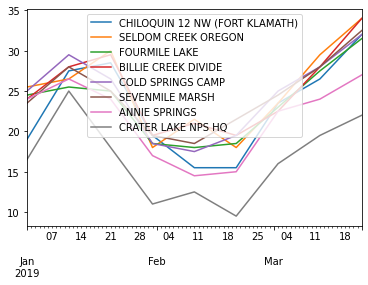

In [98]:
avgt.resample('10D').min().plot()